# Progetto Web Intelligence
Scodeller Giovanni 864906

# **NOTES**

1. Encoding player name is necessary ?
2. Wich feature i need to add ?


# Caricamento Dati e EDA

In [12]:
# LIBRERIE
import pandas as pd
import numpy as np

from function import addPrevWin, addRateo, addFieldWR, loadDataset, randomSwap, generalFormatting, trainDecisionTree, tournamentSimulation
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score

In [13]:
# CARICAMENTO DATI
df2017 = loadDataset("2017")
df2017

,ATP,Location,Tournament,Date,Series,Court,Surface,Round,Best of,Winner,...,EXW,EXL,LBW,LBL,PSW,PSL,MaxW,MaxL,AvgW,AvgL
0,1,Brisbane,Brisbane International,2017-01-01,ATP250,Outdoor,Hard,1st Round,3,Thompson J.,...,1.22,3.50,1.30,3.50,1.31,3.73,1.33,3.90,1.29,3.50
1,1,Brisbane,Brisbane International,2017-01-02,ATP250,Outdoor,Hard,1st Round,3,Mahut N.,...,1.45,2.35,1.53,2.50,1.58,2.52,1.59,2.55,1.54,2.43
2,1,Brisbane,Brisbane International,2017-01-02,ATP250,Outdoor,Hard,1st Round,3,Ferrer D.,...,1.88,1.75,2.00,1.80,2.10,1.81,2.15,1.82,2.01,1.77
3,1,Brisbane,Brisbane International,2017-01-02,ATP250,Outdoor,Hard,1st Round,3,Edmund K.,...,1.35,2.75,1.40,3.00,1.42,3.09,1.42,3.25,1.37,3.01
4,1,Brisbane,Brisbane International,2017-01-02,ATP250,Outdoor,Hard,1st Round,3,Dimitrov G.,...,1.38,2.65,1.40,3.00,1.41,3.13,1.46,3.13,1.41,2.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2628,67,London,Masters Cup,2017-11-17,Masters Cup,Indoor,Hard,Round Robin,3,Goffin D.,...,1.95,1.75,2.00,1.80,2.13,1.80,2.15,1.91,2.05,1.79
2629,67,London,Masters Cup,2017-11-17,Masters Cup,Indoor,Hard,Round Robin,3,Dimitrov G.,...,1.20,4.10,1.22,4.33,1.24,4.57,1.29,4.57,1.23,4.25
2630,67,London,Masters Cup,2017-11-18,Masters Cup,Indoor,Hard,Semifinals,3,Goffin D.,...,7.25,1.06,7.50,1.08,10.37,1.08,10.37,1.12,8.45,1.08
2631,67,London,Masters Cup,2017-11-18,Masters Cup,Indoor,Hard,Semifinals,3,Dimitrov G.,...,1.38,2.80,1.40,2.75,1.44,3.07,1.45,3.20,1.40,2.95


In [14]:
# ESPLORIAMO IL CONTENUTO DI UNA ENTRY
row = df2017.loc[140]
for i in df2017.columns:
    print(i,":", row[i])

ATP : 6
Location : Melbourne
Tournament : Australian Open
Date : 2017-01-16 00:00:00
Series : Grand Slam
Court : Outdoor
Surface : Hard
Round : 1st Round
Best of : 5
Winner : Chardy J.
Loser : Almagro N.
WRank : 72
LRank : 42.0
WPts : 705
LPts : 1040.0
W1 : 4.0
L1 : 0.0
W2 : nan
L2 : nan
W3 : nan
L3 : nan
W4 : nan
L4 : nan
W5 : nan
L5 : nan
Wsets : 0.0
Lsets : 0.0
Comment : Retired
B365W : 1.8
B365L : 2.0
EXW : 1.82
EXL : 1.82
LBW : 1.8
LBL : 2.0
PSW : 1.86
PSL : 2.05
MaxW : 1.86
MaxL : 2.06
AvgW : 1.81
AvgL : 1.97


In [15]:
# VEDIAMO I TIPI DI DATO DELLE FEATURE
df2017.dtypes

ATP                    int64
Location              object
Tournament            object
Date          datetime64[ns]
Series                object
Court                 object
Surface               object
Round                 object
Best of                int64
Winner                object
Loser                 object
WRank                  int64
LRank                float64
WPts                   int64
LPts                 float64
W1                   float64
L1                   float64
W2                   float64
L2                   float64
W3                   float64
L3                   float64
W4                   float64
L4                   float64
W5                   float64
L5                   float64
Wsets                float64
Lsets                float64
Comment               object
B365W                float64
B365L                float64
EXW                  float64
EXL                  float64
LBW                  float64
LBL                  float64
PSW           

In [16]:
# FEATURE POTENZIALMENTE CATEGORIALI O FATTORIALI
strcol=[]
for col in df2017.columns:
    if type(df2017[col][0]) == str:
        strcol.append(col)
strcol 

['Location',
 'Tournament',
 'Series',
 'Court',
 'Surface',
 'Round',
 'Winner',
 'Loser',
 'Comment']

# Funzione per una formattazione generale del dataset

In questa funzione viene anche aggiunto la colonna "target", la feature che andremmo a prevedere

In [17]:
df2017 = generalFormatting(df2017)
df2017

,Tournament,Date,Series,Round,Player1,Player2,P1_Rank,P2_Rank,P1_Pts,P2_Pts,...,P1_Avg,P2_Avg,Court_Indoor,Court_Outdoor,Surface_Clay,Surface_Grass,Surface_Hard,Best of_3,Best of_5,target
0,15,2017-01-01,0,1,Thompson J.,Ymer E.,79,160.0,689,372.0,...,1.29,3.50,0,1,0,0,1,1,0,0
1,15,2017-01-02,0,1,Mahut N.,Robert S.,39,54.0,1102,854.0,...,1.54,2.43,0,1,0,0,1,1,0,0
2,15,2017-01-02,0,1,Ferrer D.,Tomic B.,21,26.0,1785,1465.0,...,2.01,1.77,0,1,0,0,1,1,0,0
3,15,2017-01-02,0,1,Edmund K.,Escobedo E.,45,141.0,1001,443.0,...,1.37,3.01,0,1,0,0,1,1,0,0
4,15,2017-01-02,0,1,Dimitrov G.,Johnson S.,17,33.0,2035,1320.0,...,1.41,2.85,0,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2628,39,2017-11-17,3,0,Goffin D.,Thiem D.,8,4.0,2975,3815.0,...,2.05,1.79,1,0,0,0,1,1,0,0
2629,39,2017-11-17,3,0,Dimitrov G.,Carreno Busta P.,6,10.0,3650,2615.0,...,1.23,4.25,1,0,0,0,1,1,0,0
2630,39,2017-11-18,3,6,Goffin D.,Federer R.,8,2.0,2975,9005.0,...,8.45,1.08,1,0,0,0,1,1,0,0
2631,39,2017-11-18,3,6,Dimitrov G.,Sock J.,6,9.0,3650,2765.0,...,1.40,2.95,1,0,0,0,1,1,0,0


# Prima prova applicazione modello

droppiamo le colonne che non posso essere calcolate senza sapere già chi ha vinto o perso

In [18]:

df2017.drop(["Date", 'P1_S1', 'P2_S1', 'P1_S2',
       'P2_S2', 'P1_S3', 'P2_S3', 'P1_S4', 'P2_S4', 'P1_S5', 'P2_S5',
       'P1_sets', 'P2_sets', 'P1_B365', 'P2_B365', 'P1_EX', 'P2_EX', 'P1_LB',
       'P2_LB', 'P1_PS', 'P2_PS', 'P1_Max', 'P2_Max', 'P1_Avg', 'P2_Avg'], axis = 1, inplace = True)

print("Loaded 2017")


Loaded 2017


In [19]:
df2017.head()

,Tournament,Series,Round,Player1,Player2,P1_Rank,P2_Rank,P1_Pts,P2_Pts,Court_Indoor,Court_Outdoor,Surface_Clay,Surface_Grass,Surface_Hard,Best of_3,Best of_5,target
0,15,0,1,Thompson J.,Ymer E.,79,160.0,689,372.0,0,1,0,0,1,1,0,0
1,15,0,1,Mahut N.,Robert S.,39,54.0,1102,854.0,0,1,0,0,1,1,0,0
2,15,0,1,Ferrer D.,Tomic B.,21,26.0,1785,1465.0,0,1,0,0,1,1,0,0
3,15,0,1,Edmund K.,Escobedo E.,45,141.0,1001,443.0,0,1,0,0,1,1,0,0
4,15,0,1,Dimitrov G.,Johnson S.,17,33.0,2035,1320.0,0,1,0,0,1,1,0,0


 # Applicazione modello stupido
In questo modello diciamo che il giocatore più forte, ovvero quello che in classifica ha il numero più basso, vincerà sempre

In [20]:
y_test = df2017["target"]
y_pred = []
for i in range(0,df2017.shape[0]):
    y_pred.append(np.where(df2017.loc[i,"P1_Rank"] < df2017.loc[i,"P2_Rank"], 0, 1))
    
print("Accuracy score: ", accuracy_score(y_true = y_test, y_pred=y_pred))

Accuracy score:  0.6498290922901633


Notiamo che il modello è preciso al ~ 67% delle previsioni

# Creazione di nuove feature

## Swap delle righe per creazione della variabile target

In [24]:
randomSwap(df2017, 1700)

Colonne che verranno swappate:
['Player1', 'Player2', 'P1_Rank', 'P2_Rank', 'P1_Pts', 'P2_Pts']
Random swap 1699/1700


## Rateo vittorie fra giocatori rispetto l'anno precedente

## Vittorie del giocatore in un tipo di campo specifico

## Win Streak e Lose Streak di un giocatore in quell'anno

# Supervised Learning

In [38]:
X = df2017.drop(["Player1","Player2","target"], axis = 1)
y= df2017["target"]

# Applicazione KNN

In [48]:
from sklearn import neighbors
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

print(X_train.columns)

maxknn=[]

for k in range(1,15):    
    kNN = neighbors.KNeighborsClassifier(n_neighbors=k)
    kNN.fit(X_train,y_train)

    y_pred = kNN.predict(X_test)
    train_acc = accuracy_score(y_true=y_train, y_pred=dt.predict(X_train))
    test_acc = accuracy_score(y_true=y_test, y_pred=dt.predict(X_test))
    # matr[max_leaves, max_depth]=test_acc
    maxknn.append(tuple([test_acc,k]))
    #print ("Neighbors:", k, " - Train Accuracy:", train_acc, " - Test Accuracy:", test_acc)
    maxknn.append(tuple([test_acc,k]))
    
print("max Accuracy",max(maxknn)[0], "| number of neighbors",max(maxknn)[1] )

Index(['Tournament', 'Series', 'Round', 'P1_Rank', 'P2_Rank', 'P1_Pts',
       'P2_Pts', 'Court_Indoor', 'Court_Outdoor', 'Surface_Clay',
       'Surface_Grass', 'Surface_Hard', 'Best of_3', 'Best of_5'],
      dtype='object')
max Accuracy 0.8481012658227848 | number of neighbors 14


# Applicazione albero

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [45]:
leavesArr = []

# Esploro variando il numero di foglie

for max_leaves in range(2,50):
    # train and predict
    dt = tree.DecisionTreeClassifier(max_leaf_nodes=max_leaves)
    dt.fit(X_train,y_train)
    train_acc = accuracy_score(y_true=y_train, y_pred=dt.predict(X_train))
    test_acc = accuracy_score(y_true=y_test, y_pred=dt.predict(X_test))
    leavesArr.append(tuple([test_acc,max_leaves]))
    # print ("Leaves:", max_leaves, " - Train Accuracy:", train_acc, " - Test Accuracy:", test_acc)
    
print("max Accuracy",max(leavesArr)[0], "| number leaves",max(leavesArr)[1] )

max Accuracy 0.6720368239355581 | number leaves 6


In [46]:
depthArr = []

#Esploro cambiando il numero di profondita

for max_depth in range(2,50):
    # train and predict
    dt = tree.DecisionTreeClassifier(max_depth=max_depth)
    dt.fit(X_train,y_train)
    train_acc = accuracy_score(y_true=y_train, y_pred=dt.predict(X_train))
    test_acc = accuracy_score(y_true=y_test, y_pred=dt.predict(X_test))
    # matr[max_leaves, max_depth]=test_acc
    depthArr.append(tuple([test_acc,max_depth]))
    #print ("Depth:", max_depth, " - Train Accuracy:", train_acc, " - Test Accuracy:", test_acc)
    
print("max Accuracy",max(depthArr)[0], "| number depth",max(depthArr)[1] )

max Accuracy 0.6720368239355581 | number depth 3


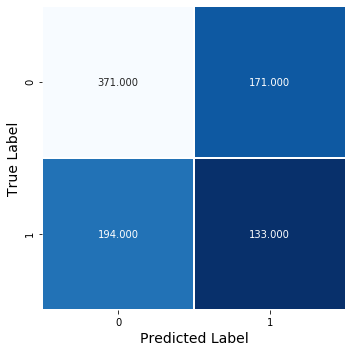

In [29]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

conf_stat = confusion_matrix(y_true=y_test, y_pred=dt.predict(X_test))

fig, ax = plt.subplots(figsize=(5,5), tight_layout=True)
sns.heatmap(conf_stat, annot=True, fmt=".3f", 
            linewidths=.5, square = True, 
            cmap = 'Blues_r',cbar=False,
            xticklabels=dt.classes_,
            yticklabels=dt.classes_);
ax.set_ylabel('True Label', fontsize=14);
ax.set_xlabel('Predicted Label', fontsize=14);

# Aggiunta feature e confronto modelli

In [49]:
df2017 = loadDataset("2017")
df2017 = generalFormatting(df2017)
df2017.drop(["Date", 'P1_S1', 'P2_S1', 'P1_S2',
       'P2_S2', 'P1_S3', 'P2_S3', 'P1_S4', 'P2_S4', 'P1_S5', 'P2_S5',
       'P1_sets', 'P2_sets', 'P1_B365', 'P2_B365', 'P1_EX', 'P2_EX', 'P1_LB',
       'P2_LB', 'P1_PS', 'P2_PS', 'P1_Max', 'P2_Max', 'P1_Avg', 'P2_Avg'], axis = 1, inplace = True)

print("Loaded 2017")

Loaded 2017


In [50]:
df2018 = loadDataset("2018")
df2018 = addFieldWR(df2018,8)
df2018.drop(["Date", 'P1_S1', 'P2_S1', 'P1_S2',
       'P2_S2', 'P1_S3', 'P2_S3', 'P1_S4', 'P2_S4', 'P1_S5', 'P2_S5',
       'P1_sets', 'P2_sets', 'P1_B365', 'P2_B365', 'P1_EX', 'P2_EX', 'P1_LB',
       'P2_LB', 'P1_PS', 'P2_PS', 'P1_Max', 'P2_Max', 'P1_Avg', 'P2_Avg'], axis = 1, inplace = True)

print("Loaded 2018")

# work on 2018 for training the model
randomSwap(df2018,1700)
addPrevWin(df2018)
addRateo(df2017,df2018)

print("2018 Ready")

addFieldWR
fieldWinLose
Loaded dataset 201 7
1343
Processing all player 43966/43967
Adding rateo 2636/2637
Loaded 2018
Colonne che verranno swappate:
['Player1', 'Player2', 'P1_Rank', 'P2_Rank', 'P1_Pts', 'P2_Pts', 'P1_winningField', 'P1_losingField', 'P2_winningField', 'P2_losingField']
Random swap 1699/1700
adding win streak / lose streak 2636/2637
2018 Ready


In [51]:
df2019 = loadDataset("2019")
df2019 = addFieldWR(df2019,9)
df2019.drop(["Date", 'P1_S1', 'P2_S1', 'P1_S2', 'P2_S2', 'P1_S3', 'P2_S3', 'P1_S4', 'P2_S4', 'P1_S5', 'P2_S5',
       'P1_sets', 'P2_sets', 'P1_B365', 'P2_B365', 'P1_PS', 'P2_PS', 'P1_Max', 'P2_Max', 'P1_Avg', 'P2_Avg'], axis = 1, inplace = True)

print("Loaded 2019")

# 2019 ready for go
addPrevWin(df2019)
randomSwap(df2019,1700)

print("Ready 2019")

addFieldWR
fieldWinLose
Loaded dataset 201 8
1381
Processing all player 46603/46604
Adding rateo 2609/2610
Loaded 2019
adding win streak / lose streak 2609/2610
Colonne che verranno swappate:
['Player1', 'Player2', 'P1_Rank', 'P2_Rank', 'P1_Pts', 'P2_Pts', 'P1_winningField', 'P1_losingField', 'P2_winningField', 'P2_losingField', 'P1_precWin', 'P2_precWin', 'P1_precLose', 'P2_precLose']
Random swap 1699/1700
Ready 2019


In [52]:
# Allenamento albero di classificazione
dt = trainDecisionTree(df2018)

Index(['Tournament', 'Series', 'Round', 'P1_Rank', 'P2_Rank', 'P1_Pts',
       'P2_Pts', 'Court_Indoor', 'Court_Outdoor', 'Surface_Clay',
       'Surface_Grass', 'Surface_Hard', 'Best of_3', 'Best of_5',
       'P1_winningField', 'P1_losingField', 'P2_winningField',
       'P2_losingField', 'P1_precWin', 'P2_precWin', 'P1_precLose',
       'P2_precLose', 'P1_WinRateo', 'P2_WinRateo'],
      dtype='object')
max Accuracy 0.9965556831228473 | number leaves 49


In [54]:
df2019bis = df2019
addRateo(df2018,df2019bis)

In [57]:
X = df2019bis.drop(["Player1","Player2","target"], axis = 1)
y= df2019bis["target"]

y_predict = dt.predict(X)

# due modi per printare l'accuracy
print(accuracy_score(y_true = y, y_pred = y_predict))
print(dt.score(X,y))

0.9885057471264368
0.9885057471264368


(2610, 24)


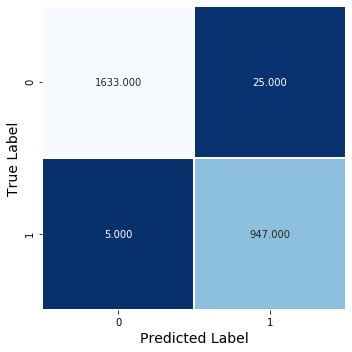

In [59]:
conf_stat = confusion_matrix(y_true=y, y_pred=y_predict)

fig, ax = plt.subplots(figsize=(5,5), tight_layout=True)
sns.heatmap(conf_stat, annot=True, fmt=".3f", 
            linewidths=.5, square = True, 
            cmap = 'Blues_r',cbar=False,
            xticklabels=dt.classes_,
            yticklabels=dt.classes_);
ax.set_ylabel('True Label', fontsize=14);
ax.set_xlabel('Predicted Label', fontsize=14);
print(X.shape)

# Considerazioni sui modelli

# Tournament Simulation

In [ ]:
tournamentSimulation(df2019.loc[139:265,:], df2018,dt)